In [224]:
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture


In [225]:
#You can use both of them, since I think our dataset should be in a folder called Data
# df1=pd.read_csv("HappinessAU.csv")
# df2=pd.read_csv("ExcitementAU.csv")
# df3=pd.read_csv("SatisfactionAU.csv")
df1=pd.read_csv("/Data/HappinessAU.csv")
df2=pd.read_csv("/Data/ExcitementAU.csv")
df3=pd.read_csv("/Data/SatisfactionAU.csv")
AU = pd.read_csv("/Data/AU_labelled.csv")

In [226]:
# train_data=pd.concat([df1,df2,df3],axis=0)
AU
# train_data

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU28,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,209.145000,60.765987,62.779830,80.853516,0.997823,210.193597,209.584650,209.403733,210.422510,...,0.065343,0.417373,0.511901,0.003285,0.286369,0.042843,0.086708,0.046729,0.022165,Happiness
1,0,38.862186,3.310227,73.794174,94.284400,0.987916,40.430004,42.186046,44.567947,48.329247,...,0.084745,0.365017,0.233744,0.056049,0.285527,0.036574,0.140138,0.019580,0.228388,Happiness
2,0,93.004196,34.654990,54.823410,75.129700,0.976319,101.162180,100.230183,99.718275,100.104785,...,0.111631,0.165691,0.120775,0.294221,0.044817,0.439250,0.075539,0.014319,0.011079,Happiness
3,0,283.274350,145.672010,85.160126,105.639800,0.898541,293.917866,297.528747,302.546140,308.411402,...,0.133572,0.029491,0.016620,0.003570,0.647834,0.014879,0.137127,0.118487,0.061483,Happiness
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0,75.916990,21.237305,42.943634,54.641724,0.994112,77.850533,77.785642,78.038246,78.863710,...,0.300253,0.192256,0.262600,0.000285,0.042643,0.196759,0.034305,0.097735,0.365673,Satisfaction
512,0,189.928240,132.254900,29.052810,37.195328,0.526255,189.460045,189.904057,191.104423,192.911918,...,0.380760,0.088069,0.123298,0.001650,0.027317,0.270580,0.063418,0.327112,0.186625,Satisfaction
513,0,308.321400,26.485643,47.169800,61.766724,0.999076,309.432076,309.620270,310.358130,311.982644,...,0.068158,0.044785,0.115017,0.010044,0.029373,0.318271,0.072354,0.362995,0.091946,Satisfaction
514,0,185.737000,30.102213,42.331620,74.898840,0.993650,190.644680,190.286148,191.271402,192.990177,...,0.368103,0.056622,0.147676,0.028472,0.048483,0.019397,0.520321,0.039649,0.196003,Satisfaction


In [227]:
# import openpyxl
# train_data = pd.read_excel("cases_2021_train_processed_2.xls")
# test_data = pd.read_excel("cases_2021_test_processed_unlabelled_2.xls")
# df1=pd.read_csv("HappinessAU.csv")
# df2=pd.read_csv("ExcitementAU.csv")
# df3=pd.read_csv("SatisfactionAU.csv")
# train_data=pd.concat([df1,df2,df3],axis=1)
# train_data=pd.merge(train_data,df3)
# train_data = train_data.drop('input', 1)
# AU.replace([np.inf, -np.inf], np.nan, inplace=True)
# AU.dropna(inplace=True) 

# AUs = pd.read_csv('HappinessAU.csv')

drop_features_x = [feature_name for feature_name in AU.keys() if feature_name.startswith(("x","y"))]
AU_X=AU.drop(drop_features_x, axis=1)

# drop_features_y = [feature_name for feature_name in Happiness_AU.keys() if feature_name.startswith("y")]
# Happiness_AU_y=Happiness_AU_X.drop(drop_features_y, axis=1)

drop_features_face = [feature_name for feature_name in AU.keys() if feature_name.startswith("Face")]
AU_X=AU_X.drop(drop_features_face, axis=1)

AU_X=AU_X.drop(['frame','input','anger','disgust','fear','happiness','sadness','surprise','neutral'],axis=1)

AU_X.dropna(inplace=True) 

AU_X

X = AU.drop('input', 1).drop('frame',1)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna()
Y = AU['input']

# # X.copy().fillna(-1).reset_index(drop=True)

# # Y = Y.reset_index(drop=True)


d:\Users\msi\anaconda3\envs\cmpt459\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [228]:
# df2=pd.read_csv("ExcitementAU.csv")
df2=pd.read_csv("/Data/ExcitementAU.csv")
df2

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU28,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,243.988100,94.718160,59.630280,74.907400,0.999028,242.107340,243.151452,244.892614,248.260423,...,0.078958,0.518097,0.130621,1.672235e-03,0.175738,0.008045,0.264966,0.024283,0.394675,/content/Excitement_img/Excitement_start_4.png
1,0,118.282690,19.403028,64.905600,90.204820,0.999220,117.941016,117.743299,118.084821,119.489631,...,0.054366,0.204211,0.097054,1.867022e-03,0.326111,0.003365,0.237670,0.055203,0.278730,/content/Excitement_img/Excitement_mid_39.png
2,0,87.832306,47.318893,26.231026,34.955452,0.891621,92.274846,92.293911,92.531992,93.139009,...,0.370436,0.355409,0.001922,3.261193e-04,0.181480,0.024361,0.205165,0.338188,0.248557,/content/Excitement_img/Excitement_mid_17.png
3,0,177.222930,42.521523,116.692780,134.695190,0.995661,164.009800,164.577776,165.740694,168.973723,...,0.093470,0.219130,0.000038,1.138351e-07,0.000287,0.016416,0.000019,0.982622,0.000619,/content/Excitement_img/Excitement_start_28.png
4,0,229.610570,13.428173,41.344757,50.807636,0.957421,227.795351,228.097535,228.933012,230.873591,...,0.189021,0.296114,0.232670,6.218429e-03,0.034642,0.577784,0.047800,0.064231,0.036655,/content/Excitement_img/Excitement_start_33.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0,242.617970,45.358128,39.994522,47.361416,0.955147,247.936105,247.764679,248.827324,250.301875,...,0.450001,0.051489,0.293998,6.165134e-03,0.017278,0.194845,0.057151,0.082981,0.347582,/content/Excitement_img/Excitement_start_40.png
238,0,209.978010,16.288600,35.260605,48.840252,0.998383,210.901071,209.525170,208.609987,208.557556,...,0.193689,0.039220,0.585323,1.930205e-03,0.001954,0.387397,0.001888,0.007165,0.014343,/content/Excitement_img/Excitement_mid_8.png
239,0,263.710970,27.907713,37.690887,48.766914,0.995776,264.046177,265.295412,266.993187,269.620922,...,0.098925,0.264249,0.023504,4.943423e-04,0.003038,0.075733,0.148729,0.706815,0.041686,/content/Excitement_img/Excitement_mid_8.png
240,0,161.915770,2.297296,41.511536,49.527634,0.981629,159.011743,159.671355,160.966989,163.498053,...,0.071983,0.178033,0.116073,1.650185e-04,0.213061,0.001350,0.304653,0.067804,0.296894,/content/Excitement_img/Excitement_mid_8.png


In [229]:
AU.describe()



# df1.describe()

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU26,AU28,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral
count,516.0,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,4.210000e+02,421.000000,421.000000,421.000000,421.000000,421.000000
mean,0.0,184.069733,59.253882,44.239484,57.274041,0.888097,185.955340,185.998718,186.776482,188.368539,...,0.406307,0.262394,0.183464,0.153465,9.237880e-03,0.141690,0.189398,0.162620,0.156323,0.187267
std,0.0,104.874422,48.849962,28.978575,38.643448,0.147809,104.770460,104.575101,104.383331,104.142543,...,0.185678,0.139542,0.164349,0.187513,3.223423e-02,0.178661,0.268758,0.170766,0.220174,0.185823
min,0.0,-5.631153,-5.280879,11.088837,14.265514,0.500105,1.303307,1.248690,1.637109,2.400775,...,0.064380,0.031640,0.001071,0.000007,1.140000e-07,0.000006,0.000315,0.000015,0.000037,0.000005
25%,0.0,95.471810,23.557041,21.981690,25.934470,0.808870,96.337433,96.318605,96.909191,98.978615,...,0.273943,0.115376,0.056622,0.013811,5.912740e-04,0.019972,0.020560,0.024441,0.019893,0.042402
50%,0.0,173.251790,43.668930,36.167953,47.835114,0.972260,172.216974,173.157313,174.068757,176.452808,...,0.347783,0.307407,0.118866,0.091617,1.867022e-03,0.079622,0.068788,0.104092,0.066539,0.142494
75%,0.0,248.741320,84.221470,59.630280,75.483460,0.995841,252.715470,251.753360,253.398875,255.719308,...,0.538746,0.379653,0.267808,0.215387,6.036947e-03,0.178852,0.221703,0.259949,0.207053,0.254973
max,0.0,464.023620,230.703100,178.232010,228.389310,0.999737,467.683772,467.085088,467.308875,468.200857,...,0.832202,0.605320,0.709041,0.976783,2.942207e-01,0.924716,0.999862,0.926488,0.982622,0.968183


In [230]:
# train_data['province'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
# data = np.delete(train_data, [0, -1], axis=1) 
# train_data.describe()
scaler = StandardScaler()
# choose_data = scaler.fit_transform(X)

choose_data = scaler.fit_transform(AU_X)


In [231]:
np.isinf(X).any()


FaceRectX         False
FaceRectY         False
FaceRectWidth     False
FaceRectHeight    False
FaceScore         False
                  ...  
fear              False
happiness         False
sadness           False
surprise          False
neutral           False
Length: 168, dtype: bool

In [232]:
np.isfinite(X).any()

FaceRectX         True
FaceRectY         True
FaceRectWidth     True
FaceRectHeight    True
FaceScore         True
                  ... 
fear              True
happiness         True
sadness           True
surprise          True
neutral           True
Length: 168, dtype: bool

In [233]:
np.isnan(X).any()

FaceRectX         True
FaceRectY         True
FaceRectWidth     True
FaceRectHeight    True
FaceScore         True
                  ... 
fear              True
happiness         True
sadness           True
surprise          True
neutral           True
Length: 168, dtype: bool

In [234]:
# train_data['country'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
pca = PCA(n_components = 3)


reduced_data = pca.fit_transform(choose_data)  


print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.57042083 0.12296371 0.08268049]
[11.43557941  2.46512971  1.65754699]


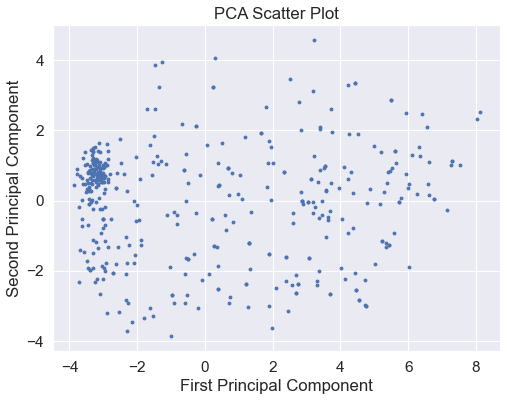

In [235]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,6)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', s=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [236]:
def pca(X,k):#k is the components you want
    #mean of each feature
    n_samples, n_features = X.shape
    mean = np.array([np.mean(X[:,i]) for i in range(n_features)])
    #normalization
    norm_X = X-mean
    #scatter matrix
    scatter_matrix = np.dot(np.transpose(norm_X),norm_X)
    #Calculate the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
    # sort eig_vec based on eig_val from highest to lowest
    eig_pairs.sort(reverse=True)
    # select the top k eig_vec
    feature = np.array([ele[1] for ele in eig_pairs[:k]])
    #get new data
    data = np.dot(norm_X,np.transpose(feature))
    return data

In [237]:
# I used some external libraries:
# numpy：https://numpy.org/
# matplotlib：https://matplotlib.org/
# sklearn：https://scikit-learn.org/stable/

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [238]:
#The range of K values (N_clusters) is given
n_clusters = range(2, 10)

k_score = np.ones_like(n_clusters).astype(float)
for n in n_clusters:
    cluster = KMeans(n_clusters=n,random_state=10).fit(reduced_data)
    # Access the labels_ attribute to get the clustering result
    y_pred = cluster.labels_
    # Access the cluster_centers_ property to obtain the centroid coordinates
    centroid = cluster.cluster_centers_
    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(reduced_data, y_pred)
    # Save
    k_score[n-2] = silhouette_avg

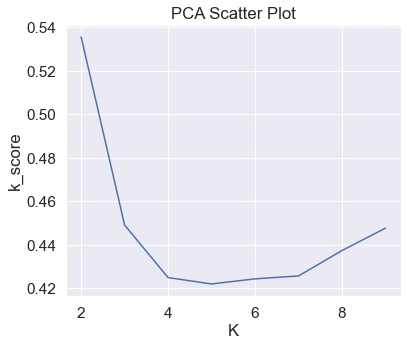

In [239]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6, 5)
ax.plot(n_clusters, k_score)
plt.xlabel('K')
plt.ylabel('k_score')
plt.title("PCA Scatter Plot")
plt.show()

In [240]:
# Calculate Euclidean distance
def distEclud(vecA, vecB):  
    return sqrt(sum(power(vecA - vecB, 2)))

#Construct cluster centers and take k random centroids
def randCent(dataSet, k): 
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))   
    for j in range(n):
        minJ = min(dataSet[:,j])
        maxJ = max(dataSet[:,j])
        rangeJ = float(maxJ - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, distMeans =distEclud, createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))    
    centroids = createCent(dataSet, k)
    # is used to judge whether the cluster has converged
    clusterChanged = True   
    while clusterChanged:
        clusterChanged = False;
        #Divide each data point into its nearest central point
        for i in range(m):  
            minDist = inf; minIndex = -1;
            for j in range(k):
                distJI = distMeans(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    # If the i-th data point is closer to the JTH center point, then I is assigned to J
                    minDist = distJI; minIndex = j  
            if clusterAssment[i,0] != minIndex: clusterChanged = True;  
            clusterAssment[i,:] = minIndex,minDist**2   
        # recalculate the center point
        for cent in range(k): 
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]   
            centroids[cent,:] = mean(ptsInClust, axis = 0)
    return centroids, clusterAssment

In [241]:
# I used some external libraries:
# numpy：https://numpy.org/
# matplotlib：https://matplotlib.org/
# sklearn：https://scikit-learn.org/stable/
# Pillow/:https://pypi.org/project/Pillow/

import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

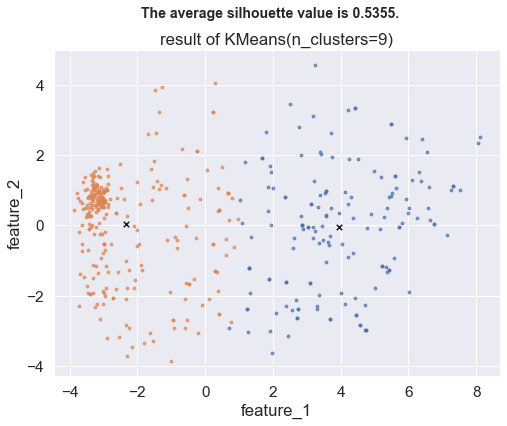

In [242]:
K = 2

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 6)

cluster = KMeans(n_clusters=K,random_state=10).fit(reduced_data)
y_pred = cluster.labels_
centroid = cluster.cluster_centers_
silhouette_avg = silhouette_score(reduced_data, y_pred)

for i in range(K):
    ax.scatter(reduced_data[y_pred==i, 0],reduced_data[y_pred==i, 1],marker='o',s=8,alpha=0.7)   
ax.scatter(centroid[:, 0],centroid[:, 1],marker='x',s=30,c='k')   
ax.set_title('result of KMeans(n_clusters={})'.format(n))   
ax.set_xlabel('feature_1')    
ax.set_ylabel('feature_2')   
plt.suptitle('The average silhouette value is {:.4f}.'.format(silhouette_avg),
             fontsize=14, fontweight='bold')
plt.show()

In [243]:

AU_X

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.493880,0.458963,0.396789,0.143738,0.764281,0.791008,0.460773,0.933125,0.415100,0.691550,0.422602,0.541510,0.284598,0.389937,0.285012,0.060926,0.923667,0.605701,0.065343,0.417373
1,0.653615,0.542717,0.247939,0.320193,0.630289,0.666229,0.284201,0.863245,0.405064,0.725350,0.404827,0.426691,0.271233,0.278503,0.274170,0.077359,0.964888,0.721195,0.084745,0.365017
2,0.567533,0.421163,0.371687,0.381893,0.252787,0.604939,0.209545,0.769360,0.379215,0.337434,0.260515,0.440132,0.294591,0.289685,0.233330,0.048385,0.950435,0.805962,0.111631,0.165691
3,0.544037,0.429999,0.340019,0.538361,0.105664,0.319093,0.032261,0.521565,0.376991,0.121347,0.335525,0.233690,0.234500,0.165870,0.406345,0.169155,0.789667,0.688325,0.133572,0.029491
8,0.410296,0.282856,0.472217,0.435793,0.039822,0.159829,0.015267,0.171727,0.376991,0.087409,0.260716,0.389399,0.516735,0.038448,0.387122,0.758768,0.266106,0.304202,0.383154,0.025457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.349630,0.332978,0.205144,0.093893,0.763386,0.650804,0.340433,0.690258,0.412876,0.836946,0.768670,0.435830,0.551128,0.182714,0.416474,0.694371,0.180345,0.203101,0.300253,0.192256
512,0.635168,0.463936,0.431410,0.413012,0.073054,0.164468,0.024916,0.185423,0.376991,0.061362,0.224242,0.454426,0.507734,0.034384,0.465166,0.621585,0.204404,0.223946,0.380760,0.088069
513,0.356063,0.354199,0.187869,0.176071,0.890040,0.841506,0.300918,0.977729,0.415100,0.982945,0.690925,0.363871,0.227239,0.179209,0.260453,0.028787,0.992492,0.665455,0.068158,0.044785
514,0.420268,0.265155,0.383475,0.596666,0.053671,0.145674,0.023649,0.244809,0.376991,0.130509,0.314958,0.420629,0.454755,0.044412,0.360992,0.760711,0.309250,0.338832,0.368103,0.056622


In [244]:
# Happiness_AU = pd.read_csv('HappinessAU.csv')

# drop_features_x = [feature_name for feature_name in Happiness_AU.keys() if feature_name.startswith(("x","y"))]
# Happiness_AU_X=Happiness_AU.drop(drop_features_x, axis=1)

# # drop_features_y = [feature_name for feature_name in Happiness_AU.keys() if feature_name.startswith("y")]
# # Happiness_AU_y=Happiness_AU_X.drop(drop_features_y, axis=1)

# drop_features_face = [feature_name for feature_name in Happiness_AU.keys() if feature_name.startswith("Face")]
# Happiness_AU_X=Happiness_AU_X.drop(drop_features_face, axis=1)

# Happiness_AU_X=Happiness_AU_X.drop(['frame','input','anger','disgust','fear','happiness','sadness','surprise','neutral'],axis=1)

# Happiness_AU_X.dropna(inplace=True) 

# Happiness_AU_X



In [245]:
AU_Y = AU['input']

In [246]:
AU_Y

0         Happiness
1         Happiness
2         Happiness
3         Happiness
4         Happiness
           ...     
511    Satisfaction
512    Satisfaction
513    Satisfaction
514    Satisfaction
515    Satisfaction
Name: input, Length: 516, dtype: object

In [247]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy = []
precision = []
recall = []
f1 = []
matrix = []

In [248]:
for train_index, test_index in kf.split(AU_X):
    train_X, train_y = AU_X.iloc[train_index,:], AU_Y[train_index]
    test_X, test_y = AU_X.iloc[test_index,:], AU_Y[test_index]
    gmm = GaussianMixture(n_components=3, random_state=0)
    gmm.fit(train_X, train_y)
    test_y_pred = gmm.predict(test_X)
    
    map_dict = {}
    test_y_copy = test_y
    test_y_pred_copy = test_y_pred
    # Because GMM is an unsupervised model, the output information is not a label, 
    # it is necessary to obtain the corresponding information of the label and the output class
    for label in test_y.unique().tolist():
        now_label = test_y_copy[test_y_copy==label]
        now_pred = test_y_pred_copy[test_y_copy==label]
        max_num = np.argmax(np.bincount(now_pred))
        map_dict[label] = max_num
        test_y_pred_copy = test_y_pred_copy[test_y_copy!=label]
        test_y_copy = test_y_copy[test_y_copy!=label]
    
    test_y = test_y.map(map_dict)
    accuracy.append(accuracy_score(test_y, test_y_pred))
    precision.append(precision_score(test_y, test_y_pred, average="macro", zero_division=0))
    recall.append(recall_score(test_y, test_y_pred, average="macro", zero_division=0))
    f1.append(f1_score(test_y, test_y_pred, average="macro"))
    matrix.append(confusion_matrix(test_y, test_y_pred))

print(f'Accuracy in Happiness_AU using an GMM is {np.mean(accuracy)}')
print(f'Precision in Happiness_AU using an GMM is {np.mean(precision)}')
print(f'Recall in Happiness_AU using an GMM is {np.mean(recall)}')
print(f'F1 in Happiness_AU using an GMM is {np.mean(f1)}')

Accuracy in Happiness_AU using an GMM is 0.4794573643410853
Precision in Happiness_AU using an GMM is 0.41124849966568233
Recall in Happiness_AU using an GMM is 0.3522391877128719
F1 in Happiness_AU using an GMM is 0.3388784262423206


In [249]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
accuracy = []
precision = []
recall = []
f1 = []
matrix = []

In [250]:

for train_index, test_index in kf.split(AU_X):
    train_X, train_y = AU_X.iloc[train_index,:], AU_Y[train_index]
    test_X, test_y = AU_X.iloc[test_index,:], AU_Y[test_index]
    svm = SVC(kernel='rbf')
    svm.fit(train_X, train_y)
    test_y_pred = svm.predict(test_X)
    accuracy.append(accuracy_score(test_y, test_y_pred))
    precision.append(precision_score(test_y, test_y_pred, average="macro", zero_division=0))
    recall.append(recall_score(test_y, test_y_pred, average="macro", zero_division=0))
    f1.append(f1_score(test_y, test_y_pred, average="macro"))
    matrix.append(confusion_matrix(test_y, test_y_pred))

print(f'Accuracy in Annotated_AU using an SVM is {np.mean(accuracy)}')
print(f'Precision in Annotated_AU using an SVM is {np.mean(precision)}')
print(f'Recall in Annotated_AU using an SVM is {np.mean(recall)}')
print(f'F1 in Annotated_AU using an SVM is {np.mean(f1)}')

Accuracy in Annotated_AU using an SVM is 0.5652941176470587
Precision in Annotated_AU using an SVM is 0.1996469113961374
Recall in Annotated_AU using an SVM is 0.3290947148090005
F1 in Annotated_AU using an SVM is 0.24495048738209407


In [251]:
AU1 = pd.read_csv('/Data/AU_labelled.csv')
# AU1 = pd.read_csv('AU_labelled.csv')

# drop_features_x = [feature_name for feature_name in Happiness_AU.keys() if feature_name.startswith(("x","y"))]
# Happiness_AU_X=Happiness_AU.drop(drop_features_x, axis=1)

# drop_features_y = [feature_name for feature_name in Happiness_AU.keys() if feature_name.startswith("y")]
# Happiness_AU_y=Happiness_AU_X.drop(drop_features_y, axis=1)

drop_features_face = [feature_name for feature_name in AU1.keys() if feature_name.startswith("Face")]
AU1_X=AU1.drop(drop_features_face, axis=1)

AU1_X=AU1_X.drop(['frame','input','anger','disgust','fear','happiness','sadness','surprise','neutral'],axis=1)

AU1_X.dropna(inplace=True) 

AU1_X

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,210.193597,209.584650,209.403733,210.422510,212.439807,215.588035,220.716872,227.965256,237.493292,247.481222,...,0.422602,0.541510,0.284598,0.389937,0.285012,0.060926,0.923667,0.605701,0.065343,0.417373
1,40.430004,42.186046,44.567947,48.329247,53.394506,60.009966,67.790833,77.062262,87.325707,96.741067,...,0.404827,0.426691,0.271233,0.278503,0.274170,0.077359,0.964888,0.721195,0.084745,0.365017
2,101.162180,100.230183,99.718275,100.104785,101.944595,105.238564,109.882126,116.027069,123.063927,130.107795,...,0.260515,0.440132,0.294591,0.289685,0.233330,0.048385,0.950435,0.805962,0.111631,0.165691
3,293.917866,297.528747,302.546140,308.411402,315.456287,323.468886,332.270776,341.214606,349.201539,354.925470,...,0.335525,0.233690,0.234500,0.165870,0.406345,0.169155,0.789667,0.688325,0.133572,0.029491
8,245.072707,244.971139,246.303258,248.746023,251.670743,255.920064,261.571537,268.011533,275.236190,281.771884,...,0.260716,0.389399,0.516735,0.038448,0.387122,0.758768,0.266106,0.304202,0.383154,0.025457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,77.850533,77.785642,78.038246,78.863710,80.985506,84.880222,90.291421,96.578725,103.051428,108.846447,...,0.768670,0.435830,0.551128,0.182714,0.416474,0.694371,0.180345,0.203101,0.300253,0.192256
512,189.460045,189.904057,191.104423,192.911918,194.993118,197.573227,200.640524,203.552590,206.353589,208.903520,...,0.224242,0.454426,0.507734,0.034384,0.465166,0.621585,0.204404,0.223946,0.380760,0.088069
513,309.432076,309.620270,310.358130,311.982644,315.117659,319.923134,325.758616,332.063349,338.244766,343.659224,...,0.690925,0.363871,0.227239,0.179209,0.260453,0.028787,0.992492,0.665455,0.068158,0.044785
514,190.644680,190.286148,191.271402,192.990177,194.925140,197.688253,201.134565,204.713105,208.385070,211.593447,...,0.314958,0.420629,0.454755,0.044412,0.360992,0.760711,0.309250,0.338832,0.368103,0.056622


In [252]:
AU1_Y = AU1['input']
AU1_Y


0         Happiness
1         Happiness
2         Happiness
3         Happiness
4         Happiness
           ...     
511    Satisfaction
512    Satisfaction
513    Satisfaction
514    Satisfaction
515    Satisfaction
Name: input, Length: 516, dtype: object

In [253]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy = []
precision = []
recall = []
f1 = []
matrix = []

In [254]:
for train_index, test_index in kf.split(AU1_X):
    train_X, train_y = AU1_X.iloc[train_index,:], AU1_Y[train_index]
    test_X, test_y = AU1_X.iloc[test_index,:], AU1_Y[test_index]
    gmm = GaussianMixture(n_components=3, random_state=0)
    gmm.fit(train_X, train_y)
    test_y_pred = gmm.predict(test_X)
    
    map_dict = {}
    test_y_copy = test_y
    test_y_pred_copy = test_y_pred
    # Because GMM is an unsupervised model, the output information is not a label, 
    # it is necessary to obtain the corresponding information of the label and the output class
    for label in test_y.unique().tolist():
        now_label = test_y_copy[test_y_copy==label]
        now_pred = test_y_pred_copy[test_y_copy==label]
        max_num = np.argmax(np.bincount(now_pred))
        map_dict[label] = max_num
        test_y_pred_copy = test_y_pred_copy[test_y_copy!=label]
        test_y_copy = test_y_copy[test_y_copy!=label]
    
    test_y = test_y.map(map_dict)
    accuracy.append(accuracy_score(test_y, test_y_pred))
    precision.append(precision_score(test_y, test_y_pred, average="macro", zero_division=0))
    recall.append(recall_score(test_y, test_y_pred, average="macro", zero_division=0))
    f1.append(f1_score(test_y, test_y_pred, average="macro"))
    matrix.append(confusion_matrix(test_y, test_y_pred))

print(f'Accuracy in XYAU using an GMM is {np.mean(accuracy)}')
print(f'Precision in XYAU using an GMM is {np.mean(precision)}')
print(f'Recall in XYAU using an GMM is {np.mean(recall)}')
print(f'F1 in XYHappiness_AU using an GMM is {np.mean(f1)}')

Accuracy in XYAU using an GMM is 0.8169988925802878
Precision in XYAU using an GMM is 0.35
Recall in XYAU using an GMM is 0.28820598006644516
F1 in XYHappiness_AU using an GMM is 0.31515383987862433


In [255]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy = []
precision = []
recall = []
f1 = []
matrix = []

In [256]:
for train_index, test_index in kf.split(AU1_X):
    train_X, train_y = AU1_X.iloc[train_index,:], AU1_Y[train_index]
    test_X, test_y = AU1_X.iloc[test_index,:], AU1_Y[test_index]
    svm = SVC(kernel='rbf')
    svm.fit(train_X, train_y)
    test_y_pred = svm.predict(test_X)
    accuracy.append(accuracy_score(test_y, test_y_pred))
    precision.append(precision_score(test_y, test_y_pred, average="macro", zero_division=0))
    recall.append(recall_score(test_y, test_y_pred, average="macro", zero_division=0))
    f1.append(f1_score(test_y, test_y_pred, average="macro"))
    matrix.append(confusion_matrix(test_y, test_y_pred))

print(f'Accuracy in XY_AU using an SVM is {np.mean(accuracy)}')
print(f'Precision in XY_AU using an SVM is {np.mean(precision)}')
print(f'Recall in XY_AU using an SVM is {np.mean(recall)}')
print(f'F1 in XY_AU using an SVM is {np.mean(f1)}')

Accuracy in XY_AU using an SVM is 0.5748615725359911
Precision in XY_AU using an SVM is 0.19162052417866374
Recall in XY_AU using an SVM is 0.33333333333333337
F1 in XY_AU using an SVM is 0.24307348575237078


In [34]:
def get_model(model_name='svm'):
    if model_name == 'xgboost':
        # model = XGBClassifier() 
        model = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
    elif model_name == 'knn':
        model = KNeighborsClassifier()
    elif model_name == 'svm':
        model = SVC()
    elif model_name == 'lgbm':
        model = lgb.LGBMClassifier()
    elif model_name =='dt':
        model = DecisionTreeClassifier()
    
    return model

In [35]:
def get_parameter(model_name='svm'):
    # search for hyperparameter
    if model_name == 'xgboost':
        learning_rate = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.1, 0.2, 0.3] 
        gamma = [1, 0.1, 0.01, 0.001, 1e-4, 1e-5]
        grid = dict(learning_rate=learning_rate, gamma=gamma)
    elif model_name == 'svm':
        kernel = ['poly', 'rbf', 'sigmoid', 'precomputed']
        gamma = [1, 0.1, 0.01, 0.001, 1e-4, 1e-5]
        grid = dict(kernel=kernel, gamma=gamma)
    elif model_name == 'knn':
        n_neighbors = [5, 6, 7, 8, 9, 10]
        algorithm = ['ball_tree', 'kd_tree', 'brute']
        grid = dict(n_neighbors=n_neighbors, algorithm=algorithm)
    elif model_name == 'lgbm':
        # learning_rate=[0.1]
        # # min_child_samples=[20000]
        # # objective=['cross_entropy']
        # # importance_type=['gain']
        # # class_weight=['balanced']
        # # boosting_type=['gbdt']
        # n_estimators=[20]
        # silent=[True]
        # n_jobs=[1]
        # random_state=[0]
        learning_rate = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.1, 0.2, 0.3] 
        lambda_l1 = [1, 0.1, 0.01, 0.001, 1e-4, 1e-5]
        # random_state=[666]
        max_depth = [5]
        # learning_rate = [0.3]
        # lambda_l1 = [1]
        # max_depth = [5]
        # # num_leaves =[0,1,2,3,4,5,6,7,8,9,10,16]
        # num_leaves = [5, 6, 7, 12, 13, 14, 15, 28, 29, 30, 31]
        # subsample = [0.8, 0.9, 1.0]
        # colsample_bytree = [0.8, 0.9, 1.0]
        # n_estimators = [20]
        grid = dict(learning_rate=learning_rate, lambda_l1=lambda_l1, max_depth=max_depth)
        # grid = dict(learning_rate=learning_rate, lambda_l1=lambda_l1,random_state=random_state)
        # grid = dict(max_depth=max_depth)
    elif model_name == 'dt':
        min_samples_leaf = [3,4,5,6, 8]  
        random_state = [10, 20, 30, 40] 
        criterion = ['gini', 'entropy']
        max_depth = [2,4,8,10,12,14,16,32]
        grid = dict(min_samples_leaf=min_samples_leaf, random_state=random_state, criterion = criterion, max_depth = max_depth)

    return grid

In [36]:
def main(model_name='svm'):
    
    param_grid = get_parameter(model_name)
   
    model = get_model(model_name)
    
    x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=99)
    
    kflod = StratifiedKFold(n_splits=5, shuffle=True, random_state=99) 
    # grid search
    grid_search = GridSearchCV(
        model, param_grid, scoring='f1_macro', n_jobs=-1, cv=kflod, verbose=3)
    # get the result
    grid_result = grid_search.fit(x_train, y_train) 
    pd.DataFrame(grid_result.cv_results_).to_csv(f'{model_name}.csv', mode='a')
    y_predict = grid_search.predict(x_test)

    print(f'model_name: {model_name}')
    print('f1_macro: ', f1_score(y_predict, y_test, average='macro'))
    print('f1 on \'deceased\': ', f1_score(y_predict, y_test, average=None)[0])
    print('acc: ', accuracy_score(y_predict, y_test))

# hyperparameter tuning

In [37]:

# main(model_name='svm')

# Overfitting

In [38]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

1 0.5123094499114975
2 0.4982973363810234
3 0.5188451760678597
4 0.4758574758574758


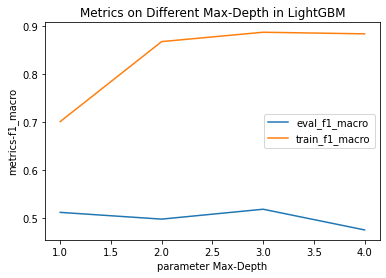

<Figure size 432x288 with 0 Axes>

In [39]:

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=99)
ks, eval_metrics = [], []
train_metrics = []
for m in range(1,5):
    # model = XGBClassifier(tree_method='gpu_hist', gpu_id=0, max_depth=max_depth, learning_rate=0.2, gamma=0.001, use_label_encoder=False)
    # model = KNeighborsClassifier(n_neighbors=k)
    model = lgb.LGBMClassifier(max_depth=m)
    model.fit(x_train, y_train)
    ks.append(m)
    eval_metrics.append(f1_score(model.predict(x_test), y_test, average='macro'))
    train_metrics.append(f1_score(model.predict(x_train), y_train, average='macro'))
    print(m, f1_score(model.predict(x_test), y_test, average='macro'))
plt.plot(np.array(ks), np.array(eval_metrics))
plt.plot(np.array(ks), np.array(train_metrics))

plt.legend(["eval_f1_macro", "train_f1_macro"])
plt.xlabel('parameter Max-Depth')
plt.ylabel('metrics-f1_macro')
plt.title('Metrics on Different Max-Depth in LightGBM')
plt.show()
plt.savefig('a.png')